## logistic回归

1. 梯度上升法

In [4]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

In [14]:
def load_dataset(file_path):
    datas = []
    with open(file_path, 'r') as fp:
        for line in fp.readlines():
            line = line.strip()
            elem = line.split('\t')
            datas.append([1] + [float(x) for x in elem])
    out = np.array(datas)
    return out[:,:3], out[:,3].astype(np.uint8)

In [15]:
dataset, labels = load_dataset('testSet.txt')
print(dataset.shape)
print(labels.shape)

(100, 3)
(100,)


## sigmoid函数

sigmoid函数是logistics回归中核心的一个函数，该函数把回归之后的模型值映射到0~1之间

In [18]:
'''
sigmoid 函数
'''
def sigmoid(x):
    return 1/(1+np.exp(-x))

'''
deviation
'''
def getDeviation(w, x, y):
    z = np.dot(x, w)
    yHat = sigmoid(z)
    return np.dot(x.T, (y - yHat))

'''
train
'''
def train(dataset, labels, iter_cnt, alpha):
    labels = labels.reshape(-1, 1)
    n, m = dataset.shape
    w = np.zeros((m, 1))
    for i in range(iter_cnt):
        w = w + alpha*getDeviation(w, dataset, labels)
    return w

w = train(dataset, labels, 500, 0.001)

In [19]:
w

array([[ 3.90548504],
       [ 0.46094335],
       [-0.58933895]])

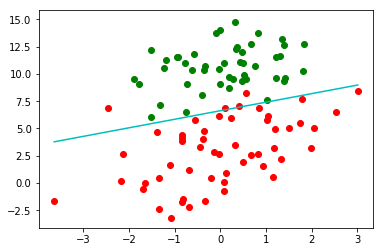

In [23]:
'''
draw the fitting model
'''
def plot_model(dataset, labels, w):
    pos_slice = labels == 1
    neg_slice = labels == 0
    plt.scatter(dataset[pos_slice, 1], dataset[pos_slice, 2], c='r')
    plt.scatter(dataset[neg_slice, 1], dataset[neg_slice, 2], c='g')
    
    min_x, max_x = dataset[:, 1].min(), dataset[:, 1].max()
    plotx = np.linspace(min_x, max_x, 10)
    ploty = -(w[0]+w[1]*plotx)/w[2]
    
    plt.plot(plotx, ploty, 'c')
    
plot_model(dataset, labels, w)